<a href="https://colab.research.google.com/github/Benteaux/sketchbook/blob/main/agent_api_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pymdp-rtd.readthedocs.io/en/latest/notebooks/using_the_agent_class.html

In [64]:
!pip install inferactively-pymdp

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def plot_likelihood(matrix, title_str = "Likelihood Distibution (A)"):

  if not np.isclose(matrix.sum(0), 1.0).all():
    raise ValueError("broski you gotta normalize the columns")

  fig = plt.figure(figsize = (6, 6))
  ax = sns.heatmap(matrix, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
  plt.title(title_str)
  plt.show()


def plot_beliefs(belief_dist, title_str = ""):

  if not np.isclose(belief_dist.sum(), 1.0):
    raise ValueError("you gotta normalise the belief distribution")

  plt.grid(zorder = 0)
  plt.bar(range(belief_dist.shape[0]), belief_dist, color = 'r', zorder = 3)
  plt.xticks(range(belief_dist.shape[0]))
  plt.title(title_str)
  plt.show()

In [67]:
import pymdp
from pymdp import utils

In [68]:
context_names = ['Left-Better', 'Right-Better']
choice_names = ['Start', 'Hint', 'Left Arm', 'Right Arm']

num_states = [len(context_names), len(choice_names)]
num_factors = len(num_states)

context_action_names = ['Do-nothing']
choice_action_names = ['Move-start', 'Get-hint', 'Play-left', 'Play-right']

num_controls = [len(context_action_names), len(choice_action_names)]

# observation modalities
hint_obs_names = ['Null', 'Hint-left', 'Hint-right']
reward_obs_names = ['Null', 'Loss', 'Reward']
choice_obs_names = ['Start', 'Hint', 'Left Arm', 'Right Arm']

num_obs = [len(hint_obs_names), len(reward_obs_names), len(choice_obs_names)]
num_modalities = len(num_obs)

In [69]:
num_obs, num_modalities

([3, 3, 4], 3)

**The A Array:** The odds of observing specific sets of observations given specific actions under specific context modes

In [70]:
A = utils.obj_array(num_modalities)

In [71]:
A

array([None, None, None], dtype=object)

In [72]:
p_hint = 0.7 # accuracy of the hint, based on how much the agent trusts the hint

A_hint = np.zeros( (len(hint_obs_names), len(context_names), len(choice_names)) )

for choice_id, choice_name in enumerate(choice_names):

  if choice_name == 'Start':

    A_hint[0, :, choice_id] = 1.0
    print(A_hint)

  elif choice_name == 'Hint':
    A_hint[1:, :, choice_id] = np.array([[p_hint, 1.0 - p_hint], [1.0 - p_hint, p_hint]])
    # hint left will gain the values [p_hint, 1.0 - p_hint], and hint right will gain the opposites
    print(A_hint)

  elif choice_name == 'Left Arm':

    A_hint[0, :, choice_id] = 1.0
    print(A_hint)

  elif choice_name == 'Right Arm':

    A_hint[0, :, choice_id] = 1.0
    print(A_hint)

[[[1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[1.  0.  0.  0. ]
  [1.  0.  0.  0. ]]

 [[0.  0.7 0.  0. ]
  [0.  0.3 0.  0. ]]

 [[0.  0.3 0.  0. ]
  [0.  0.7 0.  0. ]]]
[[[1.  0.  1.  0. ]
  [1.  0.  1.  0. ]]

 [[0.  0.7 0.  0. ]
  [0.  0.3 0.  0. ]]

 [[0.  0.3 0.  0. ]
  [0.  0.7 0.  0. ]]]
[[[1.  0.  1.  1. ]
  [1.  0.  1.  1. ]]

 [[0.  0.7 0.  0. ]
  [0.  0.3 0.  0. ]]

 [[0.  0.3 0.  0. ]
  [0.  0.7 0.  0. ]]]


In [73]:
A[0] = A_hint

In [74]:
A_hint # (# of hint observations, # of contexts, # of choices) (3, 2, 4)

array([[[1. , 0. , 1. , 1. ],
        [1. , 0. , 1. , 1. ]],

       [[0. , 0.7, 0. , 0. ],
        [0. , 0.3, 0. , 0. ]],

       [[0. , 0.3, 0. , 0. ],
        [0. , 0.7, 0. , 0. ]]])

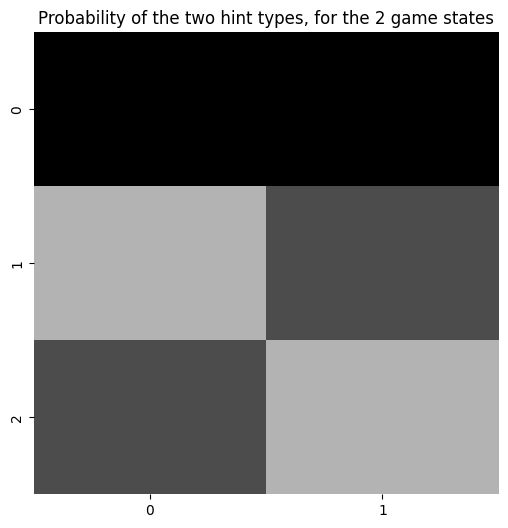

In [75]:
plot_likelihood(A[0][:, :, 1], title_str = "Probability of the two hint types, for the 2 game states")

In [76]:
A[0][:, :, 1]

array([[0. , 0. ],
       [0.7, 0.3],
       [0.3, 0.7]])

In [77]:
p_reward = 0.8 # prob of a rewarding otucome, if sampling the more rewarding bandit

A_reward = np.zeros((len(reward_obs_names), len(context_names), len(choice_names)))

for choice_id, choice_name in enumerate(choice_names):

  if choice_name == 'Start':

    A_reward[0, :, choice_id] = 1.0

  elif choice_name == 'Hint':

    A_reward[0, :, choice_id] = 1.0

  elif choice_name == 'Left Arm':

    A_reward[1:, :, choice_id] = np.array([ [1.0 - p_reward, p_reward], [p_reward, 1.0 - p_reward] ])

  elif choice_name == 'Right Arm':

    A_reward[1:, :, choice_id] = np.array([ [p_reward, 1.0 - p_reward], [1.0 - p_reward, p_reward]])

A[1] = A_reward

In [78]:
# the 3 main blocks are representative of "Null", "Loss", and "Reward"
# if the choice is Start or Hint, the reward value is Null, so we refer to the first block.
# it's 1 in both the top and bottom rows of the first block b/c the odds of a null reward are
# 100% regardless of if we're in Right Better or Left Better mode for the choices "Start" and "Hint"
A_reward


array([[[1. , 1. , 0. , 0. ],
        [1. , 1. , 0. , 0. ]],

       [[0. , 0. , 0.2, 0.8],
        [0. , 0. , 0.8, 0.2]],

       [[0. , 0. , 0.8, 0.2],
        [0. , 0. , 0.2, 0.8]]])

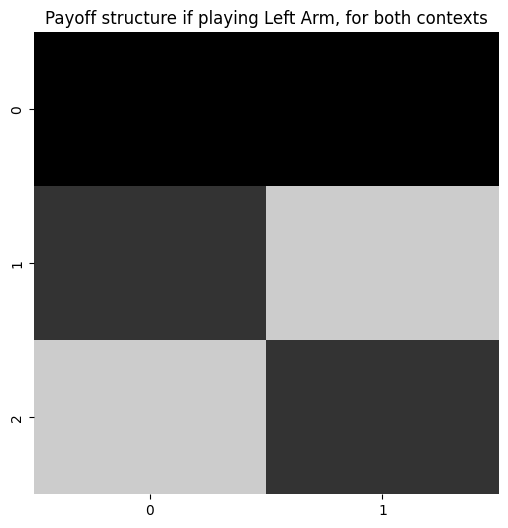

In [79]:
plot_likelihood(A[1][:, :,2], 'Payoff structure if playing Left Arm, for both contexts')

In [80]:
A_choice = np.zeros((len(choice_obs_names), len(context_names), len(choice_names)))

for choice_id in range(len(choice_names)):

  A_choice[choice_id, :, choice_id] = 1.0

A[2] = A_choice

In [81]:
A_choice # meaning of the second main block:
# regardless of whether we're in Left Better or Right Better mode, if we choose "Hint," the odds
# of actually having chosen "Hint" are 100%, and the odds of all other actiosn are 0%

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.]]])

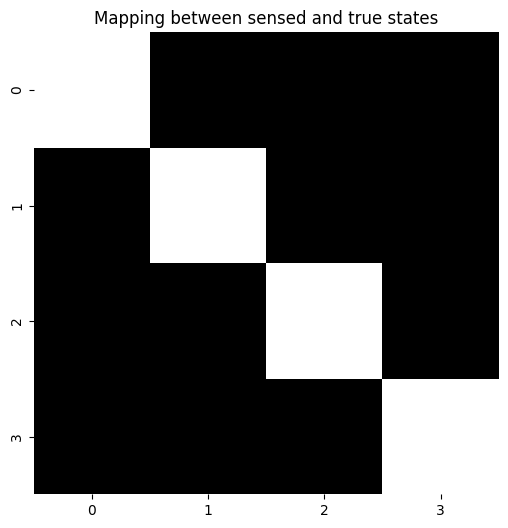

In [82]:
# aka we're always in the state we think we're in
plot_likelihood(A[2][:, 0, :], "Mapping between sensed and true states")

**The B Array:** The odds of transferring to x state based on our action in a given context (Left Better or Right Better)

In [83]:
B = utils.obj_array(num_factors)
print(B)

[None None]


In [84]:
B_context = np.zeros( (len(context_names), len(context_names), len(context_action_names)) )
print(f'Initially: {B_context}\n')
B_context[:, :, 0] = np.eye(len(context_names))
print(f'After Eye: {B_context}\n')
B[0] = B_context
print(f'All of B: {B}')

Initially: [[[0.]
  [0.]]

 [[0.]
  [0.]]]

After Eye: [[[1.]
  [0.]]

 [[0.]
  [1.]]]

All of B: [array([[[1.],
         [0.]],

        [[0.],
         [1.]]]) None]


In [85]:
# Where the first block is "Left-Better" and the second is "Right-Better":
# if we are in left better mode, the first square, meaning left better, is 1, meaning
# we are definitely, 100% in left better mode, and not in any other mode, nor can we change it,
# as remaining in left better mode is our only option (with 100% chance of occuring if we're in left better mode)
B_context

array([[[1.],
        [0.]],

       [[0.],
        [1.]]])

In [86]:
# something akin to - if we choose to start, then out of all our options, we choose to start?
B_choice = np.zeros( (len(choice_names), len(choice_names), len(choice_action_names)))

for choice_i in range(len(choice_names)):
  B_choice[choice_i, :, choice_i] = 1.0

B[1] = B_choice

In [87]:
B

array([array([[[1.],
               [0.]],

              [[0.],
               [1.]]]), array([[[1., 0., 0., 0.],
                                [1., 0., 0., 0.],
                                [1., 0., 0., 0.],
                                [1., 0., 0., 0.]],

                               [[0., 1., 0., 0.],
                                [0., 1., 0., 0.],
                                [0., 1., 0., 0.],
                                [0., 1., 0., 0.]],

                               [[0., 0., 1., 0.],
                                [0., 0., 1., 0.],
                                [0., 0., 1., 0.],
                                [0., 0., 1., 0.]],

                               [[0., 0., 0., 1.],
                                [0., 0., 0., 1.],
                                [0., 0., 0., 1.],
                                [0., 0., 0., 1.]]])], dtype=object)

**The C Vectors** - Where do we want to be?

In [88]:
C = utils.obj_array_zeros(num_obs)

In [89]:
# 3, 3, 4. The first is the # of hint obs, second is # of reward obs, 3rd is # of choice obs
C

array([array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0., 0.])],
      dtype=object)

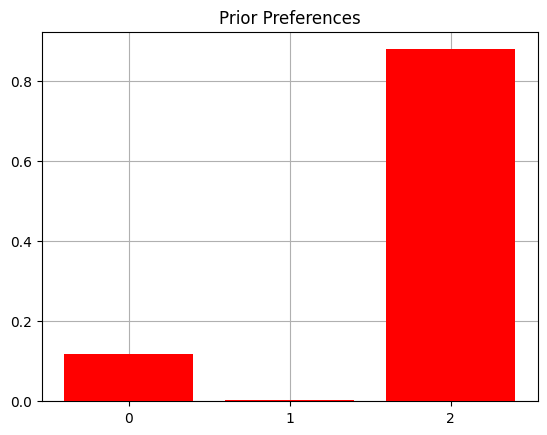

In [90]:
from pymdp.maths import softmax
C_reward = np.zeros(len(reward_obs_names))
C_reward[1] = -4.0
C_reward[2] = 2.0

C[1] = C_reward

plot_beliefs(softmax(C_reward), title_str = "Prior Preferences")

In [91]:
# rewards: Null = 0, loss = -4, reward = 2
C_reward

array([ 0., -4.,  2.])

In [92]:
# aka Null is not preferable, we REALLY don't want to lose, and reward is very preferrable
softmax(C_reward)

array([0.11894324, 0.00217852, 0.87887824])

**The D Vectors:** The Prior - What do we think the optimal decision is, and where do we think we are?

In [93]:
num_factors # aka len(num_states), where num_states is (len(context_names), len(choice_names))

2

In [94]:
D = utils.obj_array(num_factors)
D_context = np.array([0.5, 0.5])

D[0] = D_context

D_choice = np.zeros(len(choice_names))

D_choice[choice_names.index("Start")] = 1.0

D[1] = D_choice

print(f'Beliefs about which arm is better: {D[0]}')
print(f'Beliefs about starting location: {D[1]}')

Beliefs about which arm is better: [0.5 0.5]
Beliefs about starting location: [1. 0. 0. 0.]


In [95]:
D

array([array([0.5, 0.5]), array([1., 0., 0., 0.])], dtype=object)

In [96]:
from pymdp.agent import Agent

my_agent = Agent(A = A, B = B, C = C, D = D)

In [104]:
# defining the environment, aka the "generative process"
class TwoArmedBandit(object):

  def __init__(self, context = None, p_hint = 1.0, p_reward = 0.0):

    self.context_names = ["Left-Better", "Right-Better"]

    if context == None:
      self.context = self.context_names[utils.sample(np.array([0.5, 0.5]))] # randomly choose which Bandit arm is better
    else:
      self.context = context

    self.p_hint = p_hint
    self.p_reward = p_reward

    self.reward_obs_names = ['Null', 'Loss', 'Reward']
    self.hint_obs_names = ['Null', 'Hint-left', 'Hint-right']

  def step(self, action):

    if action == "Move-start":
      observed_hint = "Null"
      observed_reward = "Null"
      observed_choice = "Start"
    elif action == "Get-hint":
      if self.context == "Left-Better":
        observed_hint = self.hint_obs_names[utils.sample(np.array([0.0, self.p_hint, 1.0 - self.p_hint]))]
      elif self.context == "Right-Better":
        observed_hint = self.hint_obs_names[utils.sample(np.array([0.0, 1.0 - self.p_hint, self.p_hint]))]
      observed_reward = "Null"
      observed_choice = "Hint"
    elif action == "Play-left":
      observed_hint = "Null"
      observed_choice = "Left Arm"
      if self.context == "Left-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, 1.0 - self.p_reward, p_reward]))]
      elif self.context == "Right-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, self.p_reward, 1.0 - self.p_reward]))]
    elif action == "Play-right":
      observed_hint = "Null"
      observed_choice = "Right Arm"
      if self.context == "Right-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, 1.0 - self.p_reward, p_reward]))]
      elif self.context == "Left-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, self.p_reward, 1.0 - self.p_reward]))]

    obs = [observed_hint, observed_reward, observed_choice]

    return obs




In [105]:
def run_active_inference_loop(my_agent, my_env, T = 5):
  # first observation
  obs_label = ["Null", "Null", "Start"] # agent observes itself getting no hint, no reward, and starting
  obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]

  for t in range(T):
    qs = my_agent.infer_states(obs)
    plot_beliefs(qs[0], title_str = f'Beliefs about the context at time {t}')

    q_pi, efe = my_agent.infer_policies()
    chosen_action_id = my_agent.sample_action()
    movement_id = int(chosen_action_id[1])

    choice_action = choice_action_names[movement_id]

    obs_label = my_env.step(choice_action)

    obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]

    print(f'Action at time {t}: {choice_action}')
    print(f'Reward at time {t}: {obs_label[1]}')

# ALMOST DONE WITH THE TUTORIAL!!! YOU GOT IT!!!

context: Left-Better


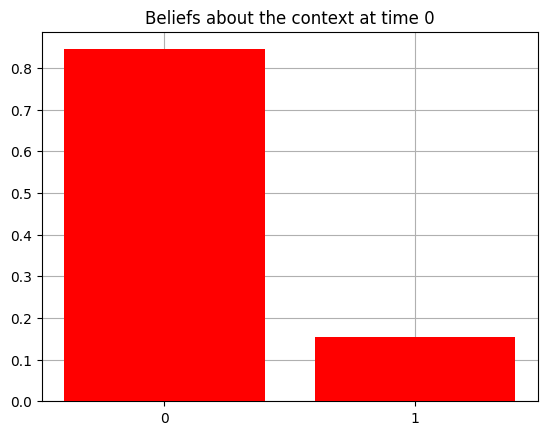

Action at time 0: Play-left
Reward at time 0: Loss


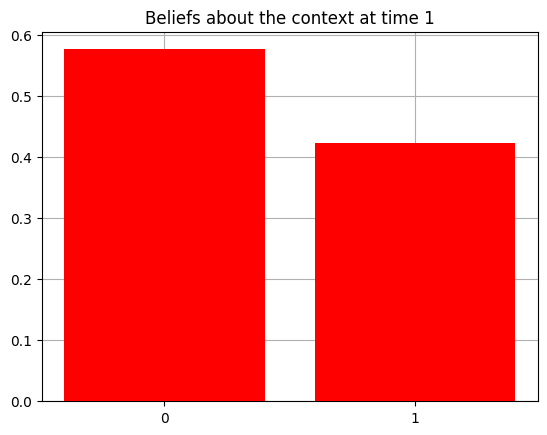

Action at time 1: Get-hint
Reward at time 1: Null


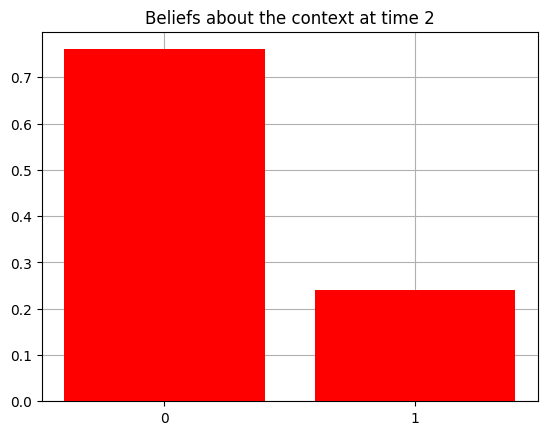

Action at time 2: Play-left
Reward at time 2: Reward


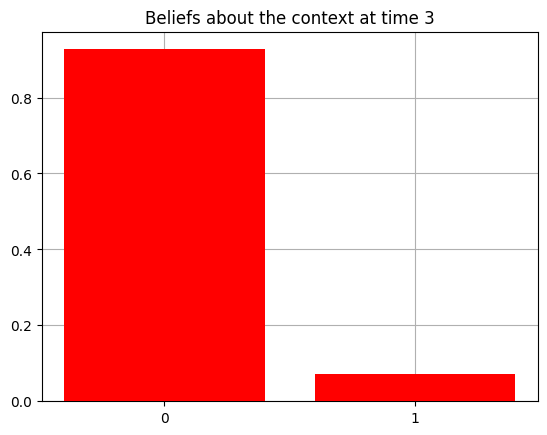

Action at time 3: Play-left
Reward at time 3: Reward


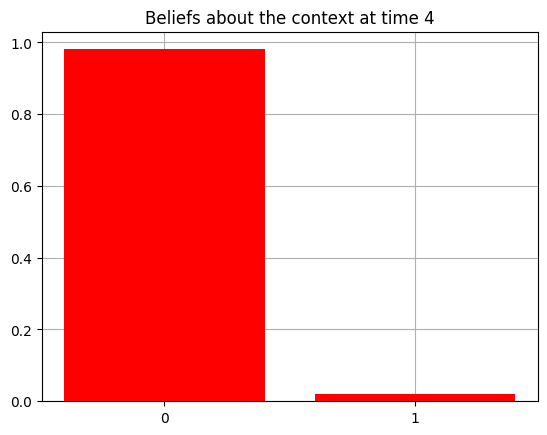

Action at time 4: Play-left
Reward at time 4: Reward


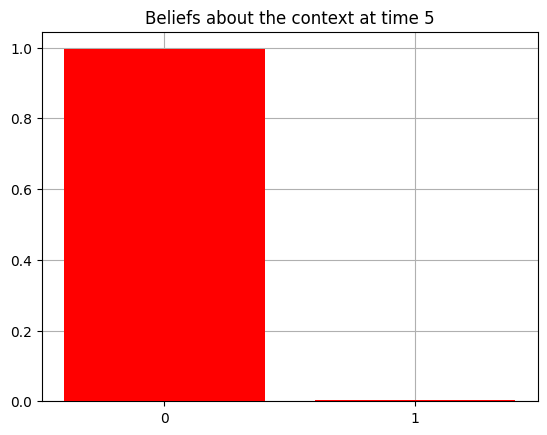

Action at time 5: Play-left
Reward at time 5: Reward


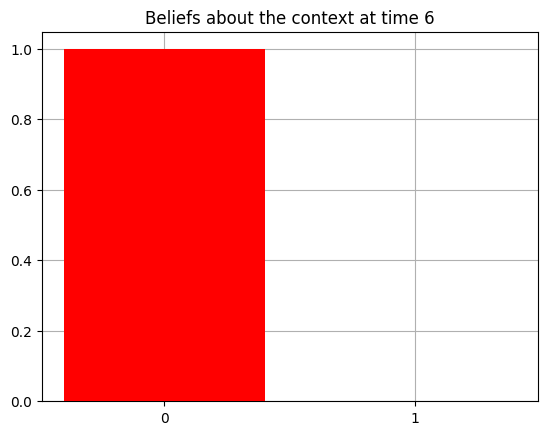

Action at time 6: Play-left
Reward at time 6: Loss


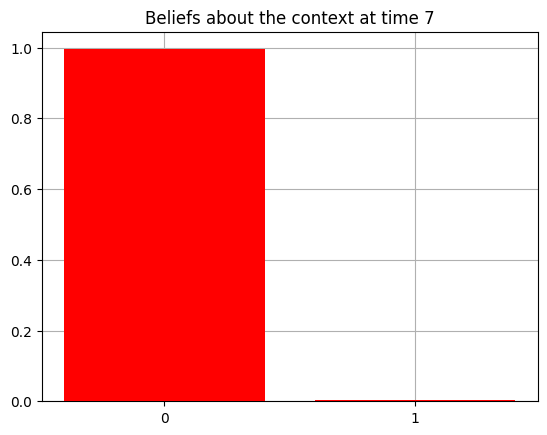

Action at time 7: Play-left
Reward at time 7: Reward


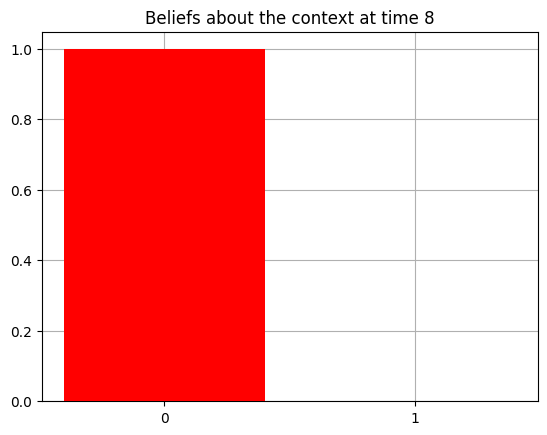

Action at time 8: Play-left
Reward at time 8: Reward


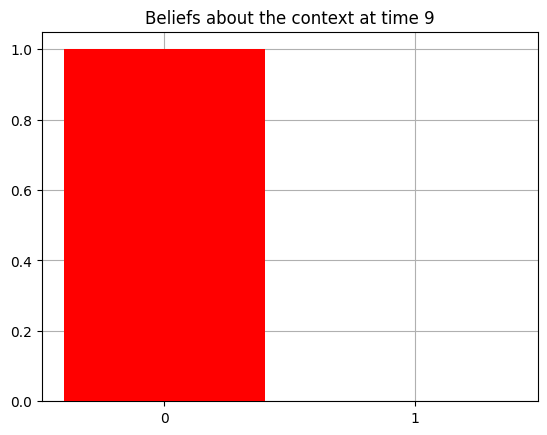

Action at time 9: Play-left
Reward at time 9: Reward


In [106]:
p_hint_env = 1.0 # true accuracy of hint, not the agent's model of it
p_reward_env = 0.7 # true reward probability, not the agent's model of it
env = TwoArmedBandit(p_hint = p_hint_env, p_reward = p_reward_env)
print(f'context: {env.context}')

T = 10

run_active_inference_loop(my_agent, env, T = T)

Context: Right-Better


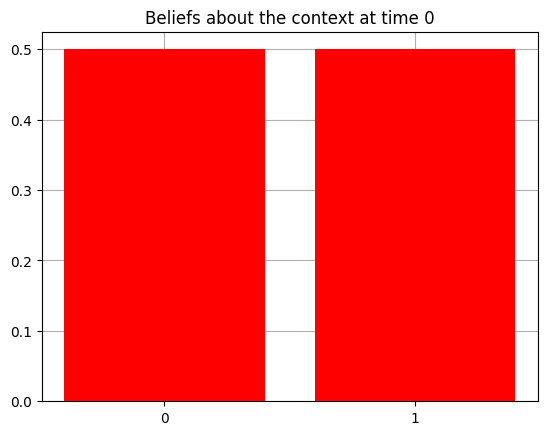

Action at time 0: Play-left
Reward at time 0: Loss


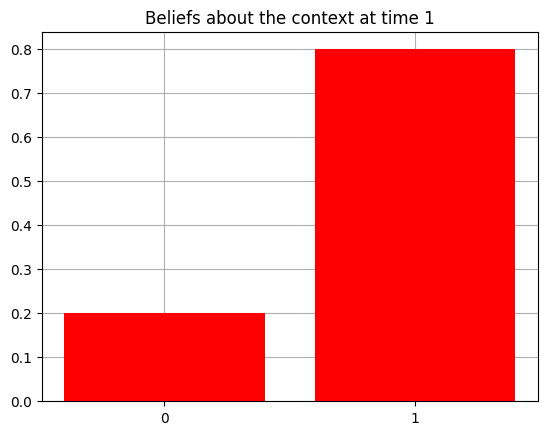

Action at time 1: Play-right
Reward at time 1: Loss


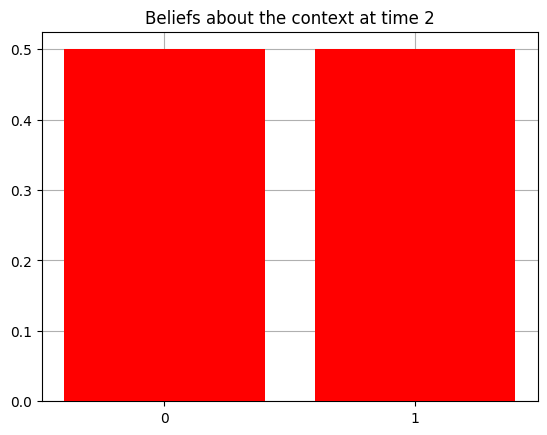

Action at time 2: Play-left
Reward at time 2: Loss


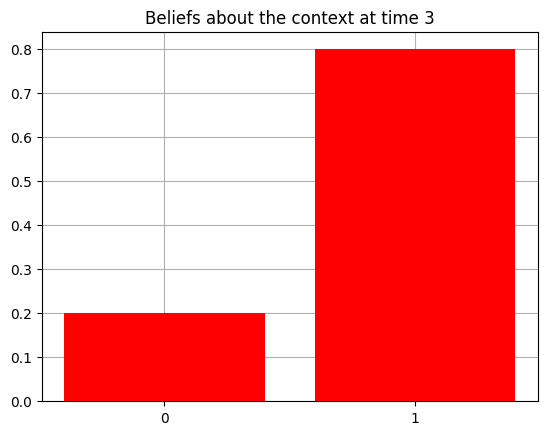

Action at time 3: Play-right
Reward at time 3: Reward


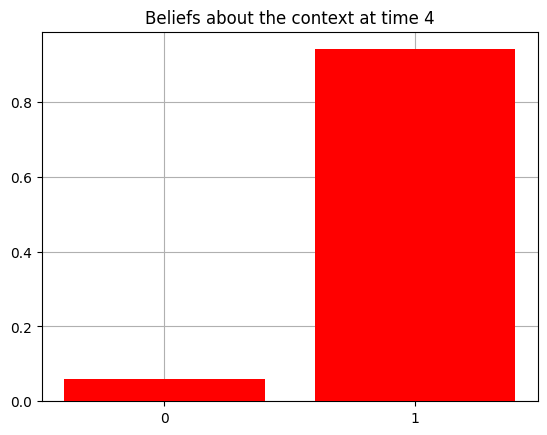

Action at time 4: Play-right
Reward at time 4: Reward


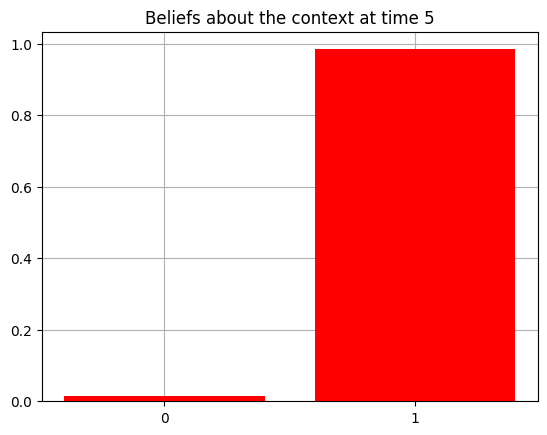

Action at time 5: Play-right
Reward at time 5: Loss


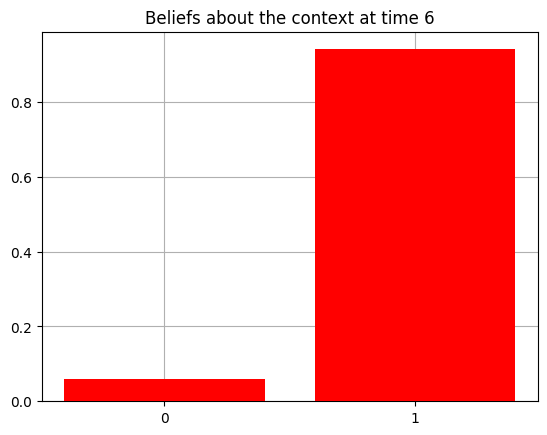

Action at time 6: Play-right
Reward at time 6: Reward


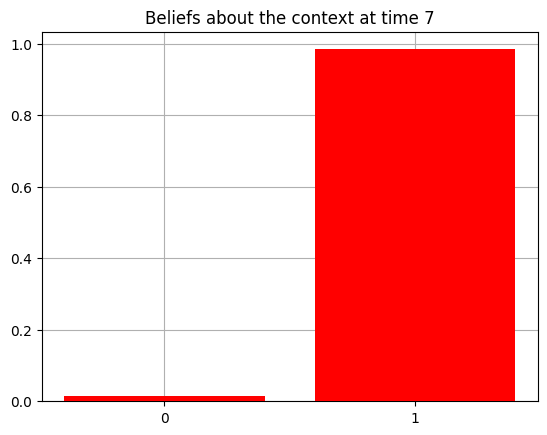

Action at time 7: Play-right
Reward at time 7: Reward


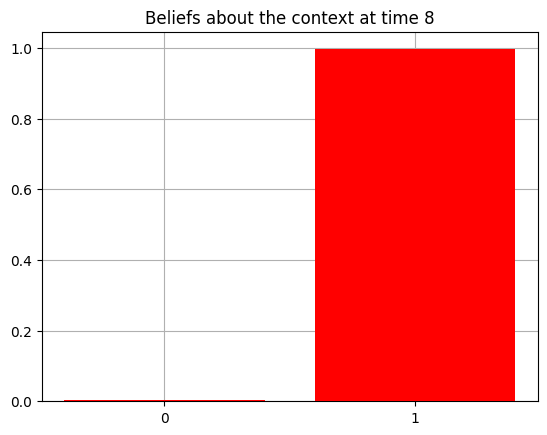

Action at time 8: Play-right
Reward at time 8: Reward


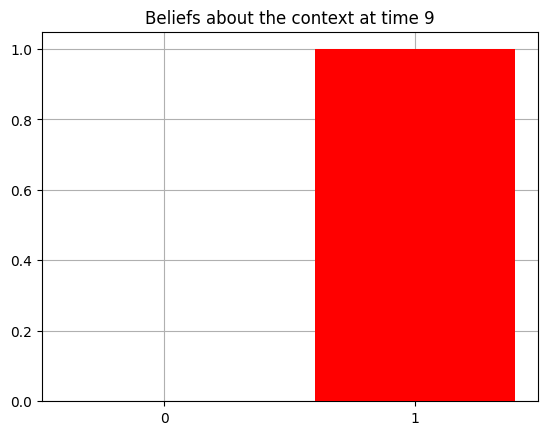

Action at time 9: Play-right
Reward at time 9: Reward


In [108]:
# changing shape of agent's reward function. changing its prior preferences
C[1][1] = 0.0 # agent is less loss averse now
my_agent = Agent(A = A, B = B, C = C, D = D)
env = TwoArmedBandit(p_hint = 0.8, p_reward = 0.8) # re initialize environment. hint is not always accurate now
print(f'Context: {env.context}')

run_active_inference_loop(my_agent, env, T = T)